# Behavioral Risk Factors Data—Health Related Quality of Life
## Analysis Pt. 1: How are people being affected by their poor health?
### Big Questions
#### 1—How is the average person affected by their health?
#### 2—How many people are <i>most</i> affected by their poor health, and how much are they affected?
#### 3—How many people think that they have poor health, and how does this compare to relatively objective numbers?

In [119]:
import pandas as pd
import numpy as np

In [120]:
#load
d = pd.read_csv('behavioralRiskFactorDataHealthRelatedQualityOfLife.csv')

In [121]:
#test
d.head()

Year LocationAbbr LocationDesc                    Category  \
0  2010.0           AL      Alabama  Health Status/Healthy Days   
1  2010.0           AL      Alabama  Health Status/Healthy Days   
2  2010.0           AL      Alabama  Health Status/Healthy Days   
3  2010.0           AL      Alabama  Health Status/Healthy Days   
4  2010.0           AL      Alabama  Health Status/Healthy Days   

                 Topic                          Question DataSource  \
0  Activity Limitation  Mean days of activity limitation      HRQOL   
1  Activity Limitation  Mean days of activity limitation      HRQOL   
2  Activity Limitation  Mean days of activity limitation      HRQOL   
3  Activity Limitation  Mean days of activity limitation      HRQOL   
4  Activity Limitation  Mean days of activity limitation      HRQOL   

  Data_Value_Unit         Data_Value_Type  Data_Value        ...          \
0             NaN  Average number of days         0.9        ...           
1             NaN  Average number of days         2.0        ...           
2             NaN  Average number of days         2.3        ...           
3             NaN  Average number of days         4.2        ...           
4             NaN  Average number of days         4.0        ...           

  Sample_Size        Break_Out  Break_Out_Category  \
0       202.0  18-24 years old           Age Group   
1       597.0  25-34 years old           Age Group   
2       892.0  35-44 years old           Age Group   
3      1352.0  45-54 years old           Age Group   
4      1621.0  55-64 years old           Age Group   

                               GeoLocation  CategoryId   TopicId QuestionId  \
0  (32.84057112200048, -86.63186076199969)      HLT001  POORHLTH      AL002   
1  (32.84057112200048, -86.63186076199969)      HLT001  POORHLTH      AL002   
2  (32.84057112200048, -86.63186076199969)      HLT001  POORHLTH      AL002   
3  (32.84057112200048, -86.63186076199969)      HLT001  POORHLTH      AL002   
4  (32.84057112200048, -86.63186076199969)      HLT001  POORHLTH      AL002   

  LocationId BreakOutId BreakOutCategoryid  
0          1       Age1              GPAGE  
1          1       Age2              GPAGE  
2          1       Age3              GPAGE  
3          1       Age4              GPAGE  
4          1       Age5              GPAGE  

[5 rows x 25 columns]

### Now let's look at what questions we're looking at

In [122]:
#list of questions
q = []

for i in d.Question:
    #factor out repeats
    if i not in q:
        q.append(i)

#pretty print
for n,i in enumerate(q):
    print '%d) %s.'%(n+1,i)

1) Mean days of activity limitation.
2) Mean mentally unhealthy days.
3) Mean physically or mentally unhealthy days.
4) Mean physically unhealthy days.
5) Percentage with 14 or more activity limitation days.
6) Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress).
7) Percentage with 14 or more physically unhealthy days.
8) Percentage with fair or poor self-rated health.


#### We can split this to answer our big questions.

### How is the average person affected by their health?
We will answer this through analysis of mean days of activity limitation, mean mentally unhealthy days, mean physically or mentally unhealthy days, and mean physically unhealthy days.

In [123]:
avgData = {}

Average days of Activity Limitation Everywhere

In [124]:
import math 

activityLim = d[d.Question == 'Mean days of activity limitation']

sm = 0
n=0

for i in activityLim['Data_Value']:
    #filter out empty spaces in csv
    if not math.isnan(i):
        sm+=float(i)
        n+=1.0

avgActivityLim = sm/n
print avgActivityLim

avgData['Activity Limitation'] = avgActivityLim

2.08573403172


Average days of Mentally Unhealthy Days Everywhere

In [125]:
mentalLim = d[d.Question == 'Mean mentally unhealthy days']

sm = 0
n=0

for i in mentalLim['Data_Value']:
    #filter out empty spaces in csv
    if not math.isnan(i):
        sm+=float(i)
        n+=1.0

avgMentalLim = sm/n
print avgMentalLim

avgData['Mentally unhealthy'] = avgMentalLim

3.19118288957


Average days of Physically Unhealthy Days Everywhere

In [126]:
physicalLim = d[d.Question == 'Mean physically unhealthy days']

sm = 0
n=0

for i in physicalLim['Data_Value']:
    #filter out empty spaces in csv
    if not math.isnan(i):
        sm+=float(i)
        n+=1.0

avgPhysicalLim = sm/n
print avgPhysicalLim

avgData['Physically unhealthy'] = avgPhysicalLim

3.5369489306


So what does this data show us?

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x1114bb290>,
 <a list of 3 Text xticklabel objects>)

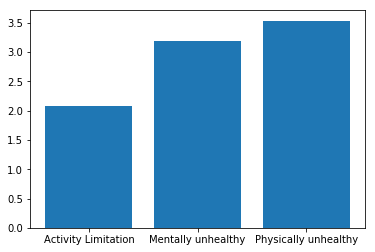

In [128]:
plt.bar(range(len(avgData)), avgData.values(), align='center')
plt.xticks(range(len(avgData)), avgData.keys())

#### Conclusions from this part
<ul>
    <li>No significant amount of days lost from any category.</li>
    <li>Physically unhealthy days more than mentally unhealthy days.</li>
    <li>Very few days of activity limitation, overall.</li>
</ul>

### How many people are most affected by their poor health, and how much are they affected?
We will answer this through analysis of percentage with 14 or more activity limitation days, percentage with 14 or more mentally unhealthy days (Frequent Mental Distress), and percentage with 14 or more physically unhealthy days.

Percentage of people with 14 or more activity limitation days.

In [129]:
extData = {}

highActivityLim = d[d.Question == 'Percentage with 14 or more activity limitation days']

sm = 0
n=0

for i in highActivityLim['Data_Value']:
    #filter out empty spaces in csv
    if not math.isnan(i):
        sm+=float(i)
        n+=1.0

avgHighActivityLim = sm/n
print avgHighActivityLim

extData['Activity Limitation'] = avgHighActivityLim

6.5060744944


Percentage with 14 or more mentally unhealthy days

In [130]:
highMentalLim = d[d.Question == 'Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)']

sm = 0
n=0

for i in highMentalLim['Data_Value']:
    #filter out empty spaces in csv
    if not math.isnan(i):
        sm+=float(i)
        n+=1.0

avgHighMentalLim = sm/n
print avgHighMentalLim

extData['Mental Limitation'] = avgHighMentalLim

9.61342208643


Percentage with 14 more physically unhealthy days

In [131]:
highPhysicalLim = d[d.Question == 'Percentage with 14 or more physically unhealthy days']

sm = 0
n=0

for i in highPhysicalLim['Data_Value']:
    #filter out empty spaces in csv
    if not math.isnan(i):
        sm+=float(i)
        n+=1.0

avgHighPhysicalLim = sm/n
print avgHighPhysicalLim

extData['Physical Limitation'] = avgHighPhysicalLim

10.7655026917


([<matplotlib.axis.XTick at 0x1115ea810>,
 <a list of 3 Text xticklabel objects>)

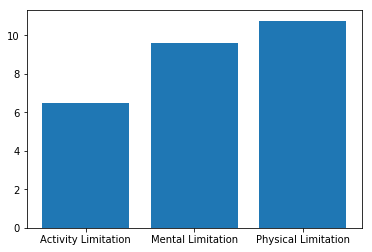

In [132]:
plt.bar(range(len(extData)), extData.values(), align='center')
plt.xticks(range(len(extData)), extData.keys())

#### Conclusions from this part
<ul>
    <li>Activity limitation minimal—few people suffer from it.</li>
    <li>Not a big difference between mental and physical limitation.</li>
    <li>Those who suffer do so greatly—14 is significantly more than 3.5, the max suffered by the average person, and 10% is still a significant amount of the population. There's clearly room for improvement.</li>
</ul>

### How many people think that they have poor health, and how does this compare to relatively objective numbers
We will answer this through analysis of percentage with fair or poor self-rated health.

In [133]:
sRep = d[d.Question == 'Percentage with fair or poor self-rated health']

sm = 0
n=0

for i in sRep['Data_Value']:
    #filter out empty spaces in csv
    if not math.isnan(i):
        sm+=float(i)
        n+=1.0

avgSRep = sm/n
print avgSRep

16.3679748712


Let's plot this against our other data.

([<matplotlib.axis.XTick at 0x1114b5d50>,
 <a list of 4 Text xticklabel objects>)

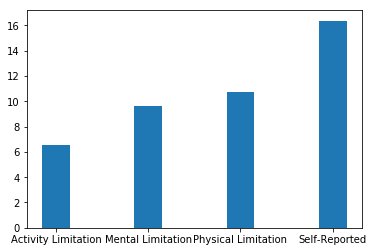

In [134]:
xVals = extData.values()
yVals = extData.keys()

xVals.append(avgSRep)
yVals.append('Self-Reported')

plt.bar(range(len(extData)+1), xVals,.3)
plt.xticks(range(len(extData)+1), yVals)

#### Conclusions from this part
<ul>
    <li>More people self-report poor health than suffer from mental or physical health limitations.</li>
    <li>Implies obsession with health and wellness.</li>
</ul>

# Insights

<ol>
    <li>The average person doesn't lose much from poor health, in terms of days made inactive, etc. due to suffering.</li>
    <li>There are a not-inconsiderable amount of people who <i>do</i> lose a lot from poor health; though they are relatively few, their loss is significant.</li>
    <li>More people <i>believe</i> that they belong to this category than actually do, leaning toward the conclusion of some sort of nation-wide hypochondiracy.</li>
</ol>

## Analysis Pt. 2: Health differences
### Big Questions
#### 1—How does health differ by state?
#### 2—How does health differ by age group?
#### 3—How has health changed over time?

In [142]:
#just a reference; not part of analysis
d.columns

Hello World


In [140]:
#a dictionary of dictionaries to get more info on states
states = {}
for i in d['LocationAbbr']:
    if i not in states:
        states[i] = {}
        #bring back our questions list from before
        for j in q:
            states[i][j] = 0

#note: there are 52 states here because we're counting DC + puerto rico
print len(states.keys())
#one time diagnostic--double check our dict is properly compiled
#print states

52


In [137]:
print 'start'
for state in states:
    info = d[d['LocationAbbr'] == state]
    for j in info['Question']:
        print j
        print ""
    #print states[str(d['LocationAbbr'])[:1]]
print 'done'    
#print states

start
Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days



Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhe

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or menta

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhea


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean day

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage wi


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Per

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Me


Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Fre

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percent


Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or m


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or me


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation 

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean day

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically 


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days 


Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limita


Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percenta

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Freq


Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unh


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physical


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or 


Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 o


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage 


Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy d


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unh


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean mentally unhealthy days

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitatio


Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physic

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or 

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean phy


Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean phys


Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or ment


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physical

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or men


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean ph


Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean ph

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy 

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean physically unhealthy days

Mean physically unhealthy days

Mean d


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean days of activity limitation

Mean days of activity limitat


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mental

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean day

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or menta


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean da


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated healt


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poo

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Me

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentall


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percenta

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Perc

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with 

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 o


Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unh


Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealt

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days




Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Per

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity 


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity l


Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean phys


Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean da


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitat


Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Pe

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or men

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or mo


Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealt


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more a


Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activi

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhe

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days



Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physi

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealth


Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Per

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy 

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy


Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limita

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)


Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean phys


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean ph

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

P

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

P

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with fair or poor self-rated health

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy 

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distres


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more a


Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealt


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhea


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean m

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhe

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or men

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy 

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or 


Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Dist

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or mo

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy 


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mea

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unheal


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhea

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy 

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage 


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more a


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unh

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with


Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy day


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair 

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distr

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhe


Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitati

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of act


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically u

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy da

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of act


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Per


Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with fair or poor self-rated health

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unh

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distres

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days



Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of act

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean day

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentag

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with 

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days 

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or menta


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean ph

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Me


Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distres


Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or m

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitat


Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean 


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated healt


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhea


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean phy


Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

P


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean phys


Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physical

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress


Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically or mentally unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealt

Percentage with fair or poor self-rated health

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean days of activity limitation

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhealthy days

Mean mentally unhe


Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Percentage with fair or poor self-rated health

Per

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or


Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more mentally unhealthy days (Frequent Mental Distress)

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more physically unhealthy days

Percentage with 14 or more phys


Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or 


Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Mean physically unhealthy days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or more activity limitation days

Percentage with 14 or 

## Analysis Pt. 3: Spreading sample size to population data


In [ ]:
#let's go through each state and fill the dict
for state in states:
    #states[state]
    for question in states[state]:
        sm = 0.0
        total = 0.0
        nums = d[(d.Question == question) & (d.LocationAbbr == state)]
        print nums
        for i in nums['Data_Value']:
            sm += i
            total += 1.0
        avg = sm/total
        states[state][question] = avg

print states